In [ ]:
# In colab run this cell first to setup the file structure!
%cd /content
!rm -rf MOL518-Intro-to-Data-Analysis

!git clone https://github.com/shaevitz/MOL518-Intro-to-Data-Analysis.git
%cd MOL518-Intro-to-Data-Analysis/Lecture_4

# Lecture 4: Loops and Control Flow

In this lecture we introduce **loops** and **conditional logic**. These tools let us repeat operations and make decisions when the structure of a problem does not naturally fit into a single operation.

## For loops and indexing sequential elements of an array

In many problems, we want to repeat an operation a specific number of times and keep track of where we are. To do this, Python provides the function `range`.

`range(n)` generates a sequence of integers starting at 0 and ending at n − 1. By indexing the array with each element of range, we can tell Python to do an operation once for each position.

When we combine range with len, we can loop over the valid indices of an array. This lets us access elements by position using square bracket indexing.

In [4]:
import numpy as np

values = np.array([1, 3, 5, 7, 9])

indices = range(len(values))

A `for` loop repeats a block of code once for each item in a sequence. Sometimes that sequence is a range of numbers, and sometimes it is the values in a list or array.

First, let's look at the indices we can use to loop over the `values` array. This command tells Python to print the index `i` for each of entry in `indices`

In [5]:
for i in indices:
    print(i)

0
1
2
3
4


As expected there are five entries, one for each entry in `values`. Notice, that the index starts at zero (!) so the highest index is 4.

Now we can loop over the values array and build up to the total sum one step at a time.

(Note, I used the character `\n` in the print statement to make a *new line*)

In [ ]:
# We *initialize* the total to zero before the loop!
total = 0

# Loop over the values in the array
for i in range(len(values)):
    v = values[i]
    total = total + v
    print("Running total:", total)

# Final result after the loop finishes
print("-----\nFinal total:", total)

Running total: 1
Running total: 4
Running total: 9
Running total: 16
Running total: 25
-----
Final total: 25


Now that we've done things very explicitely, there is a shortcut way to loop over the values in a list (of which an array is one example). You will likely use this one more,

In [11]:
total = 0

for v in values:
    total = total + v
    print("running total:", total)

print("-----\nFinal total:", total)

running total: 1
running total: 4
running total: 9
running total: 16
running total: 25
-----
Final total: 25


## Indentation matters

In Python, indentation is not cosmetic. It defines which lines of code belong together in groups such as the `for loop`. Loops and conditionals only apply to the indented block that follows them.

Let's see what happens if we forget to indent.

In [ ]:
# An ntentional indentation error
for i in range(3):
print(i)

IndentationError: expected an indented block after 'for' statement on line 2 (1714063999.py, line 3)

Python will report an `IndentationError`. This is helpful, because it stops your program before it does the wrong thing.

Go and fix the above cell and confirm it works as expected.

More dangerous are cases where the indentation is *legal* but incorrect, leading to logic bugs rather than explicit errors. Take this case, which was meant to print the first three even numbers.

In [ ]:
for i in range(3):
    x = i * 2
print(x)

4


Do you understand why it printed `4` instead of `0 2 4`?

### Exercise 1

Compute and print the mean (average) of the following set of numbers using a for loop: 17, 6, 12, 187, 513.

In [ ]:
# Your code here




## Making decisions with conditionals

`if`, `elif`, and `else` let us make decisions inside a program. They allow a program to choose what to do based on the value of a variable, rather than always executing the same instructions.

A conditional statement evaluates a **boolean expression**, something that is either `True` or `False`. Only the block of code associated with a true condition is executed. All other blocks are skipped.

Some examples of boolean expressions are:

- `x > 0`; Is `x` greater than 0?  
- `x < 5`; Is `x` less than 5?  
- `x == 3`; Is `x` equal to 3?  (Note, that `=` sets the value of a variable, `==` asks if it is equal to a value...)
- `x != 0`; Is `x` not equal to 0?  
- `(x > 0) and (x < 10)`; Is `x` greater than 0 *and* less than 10 at the same time?  
- `(x < 0) or (x > 1)`; Is `x` less than 0 *or* greater than 1?

Each of these expressions evaluates to either `True` or `False`.

We start with the `if` condition. If it is true, that block of code runs and the rest are ignored. If it is false, Python moves on to the `elif` (short for else if) condition. This continues until a true condition is found. If none of the conditions are true, the `else` block runs.

Note, that you don't have to use `elif` or `else`...

Conditionals are often used inside loops, where the same decision must be made repeatedly for different values. In the example below, we loop over a set of numbers and classify each one based on its value using a series of conditional statements.

In [21]:
numbers = [2, -1, 4, -3, 0]

for n in numbers:
    if n > 0:
        print(n, "is positive")
    elif n < 0:
        print(n, "is negative")
    else:
        print(n, "is zero")

2 is positive
-1 is negative
4 is positive
-3 is negative
0 is zero


## Example 1: Peak finding in a mass spectrum

We now apply loops and conditionals to find peaks in sample data from the mass spectrometer in Prof. Wuhr’s lab. The data come from an ion trap instrument operating in positive ion mode. Each point represents the measured intensity of ions at a particular *m/z* value, where *m/z* is the ratio of an ion’s mass to its charge. Our goal is to identify *m/z* values where the signal forms a local maximum that stands out above background noise.

First we load the data from the CSV file and copy out the two columns into mz and intensity arrays.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/mass_spectrum.csv", delimiter=",", skiprows=1)
mz = data[:, 0]
intensity = data[:, 1]

Let's plot the results to see what it looks like.

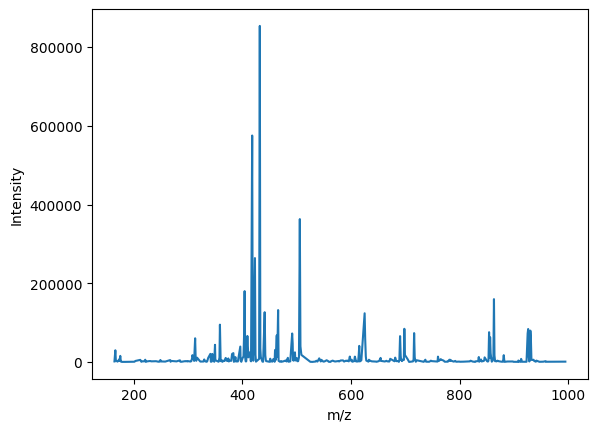

In [26]:
plt.plot(mz, intensity)
plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.show()

We see a series of peaks that represent the different ions in the sample. To find the *m/z* valus for the peaks, we will loop over indices and compare the intensity of each point to its neighbors. If an index is higher than it's neighbors then we count it as a peak.

To add the peak index to an array of indices, we will `append` it to the end of the array using `peak_indices.append(i)`.

Note, we will avoid the first and last points because they do not have two neighbors.

In [28]:
#initialize an array for the peak indices
peak_indices = []

for i in range(1, len(intensity) - 1):
    if intensity[i] > intensity[i-1] and intensity[i] > intensity[i+1]:
            peak_indices.append(i)

print("Number of peaks found:", len(peak_indices))
print("First few peak indices:", peak_indices[:5])

Number of peaks found: 110
First few peak indices: [1, 4, 6, 13, 16]


Let's plot the location of each peak on top of the spectrum. The location of the i-th peak is given by 

*(x,y)=(mz(i),Intensity(i))*.

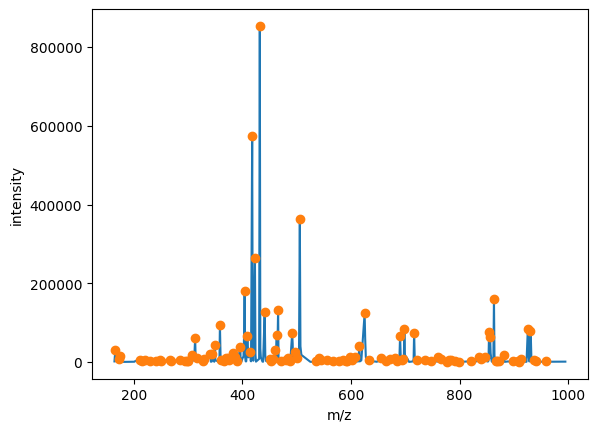

In [29]:
# Plot spectrum with peaks marked
plt.plot(mz, intensity) #plot the raw spectrum
plt.plot(mz[peak_indices], intensity[peak_indices], "o") # plot the peaks
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

Oof, that's a log of peaks near the low intensity which are causes by noise. What we need to do is tell Python to only look at indices whose Intensity is above a certain threshold, which we will eyeball as 150,000 to be conservative for now. We can do this with two `if` statements.

Number of peaks found: 6
First few peak indices: [104, 115, 118, 122, 168]


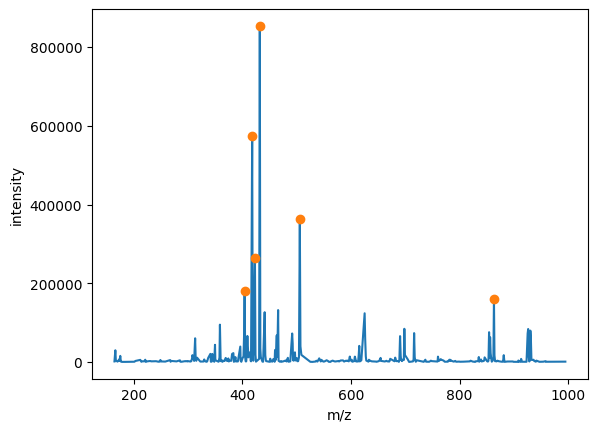

In [35]:
threshold = 150000

peak_indices = []

for i in range(1, len(intensity) - 1):
    if intensity[i] > threshold:
        if intensity[i] > intensity[i-1] and intensity[i] > intensity[i+1]:
            peak_indices.append(i)

print("Number of peaks found:", len(peak_indices))
print("First few peak indices:", peak_indices[:5])

plt.plot(mz, intensity) #plot the raw spectrum
plt.plot(mz[peak_indices], intensity[peak_indices], "o") # plot the peaks
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

Much better, we've found a small number of peaks that each correspond visually to a peak in the spectrum!

### Exercise 2

We've clearly set the threshold too high as there are many more peaks in the spectrum that look "real". Try different thresholds to find one that you think is best. How many peaks do you find? Then have Python print out a list of the *m/z* values of the peaks.

In [ ]:
# Your code here




## Loops versus arrays

Many operations can be written either as explicit loops or as NumPy array operations. Array-based code is often shorter and faster, but loops can be clearer when the logic is complex.

Below is the same thresholding operation written without a loop.

In [ ]:
mask = measurements > 0.5
genes[mask]

Both approaches are useful. The important habit is choosing the one that is easiest to read, debug, and explain.

## Common failure modes

- Off-by-one indexing errors
- Forgetting to initialize accumulator variables
- Confusing `=` with `==`
- Mixing data types when building lists